In [60]:
import torch
import torchvision
import tarfile

In [61]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
!ls

'Copy of main_download_pretrained_models.py'   main_test_swinir.py
 data					       main_test_usrnet.py
 docs					       main_test_vrt.py
 figs					       main_train_dncnn.py
 kernels				       main_train_drunet.py
 LICENSE				       main_train_gan.py
 main_challenge_sr.py			       main_train_psnr.py
 main_download_pretrained_models.py	       main_train_usrnet.py
 main_test_dncnn3_deblocking.py		       main_train_vrt.py
 main_test_dncnn.py			       matlab
 main_test_dncnn.sh			       models
 main_test_dpsr.py			       model_zoo
 main_test_face_enhancement.py		       options
 main_test_fdncnn.py			       README.md
 main_test_ffdnet.py			       requirement.txt
 main_test_FFDnet.sh			       results
 main_test_imdn.py			       retinaface
 main_test_ircnn_denoiser.py		       scripts
 main_test_msrresnet.py			       testsets
 main_test_rrdb.py			       trainsets
 main_test_srmd.py			       utils


In [63]:
#!git clone https://github.com/cszn/KAIR

In [64]:
file="BSDS300-images.tgz"

In [66]:
os.chdir('/content/drive/MyDrive/')

In [67]:
tar = tarfile.open(file, "r:*")
tar.extractall()
tar.close()

In [68]:
#tar #This is a Tar file that we must use

In [69]:
#location='/content/drive/MyDrive/BSDS300/images/train'

In [70]:
import cv2

def prepare_training_data(transform,location):
  training_data=[]
  for img in os.listdir(location):
    loaded=cv2.imread(os.path.join(location,img))
    training_data.append(loaded)
  return training_data



In [71]:
from torchvision import transforms


In [72]:
"""

#transform1=transforms.Compose([transforms.ToTensor(), 
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                             ])
#transform2=transforms.Compose([transforms.ToTensor(), 
                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                             ,transforms.GaussianBlur(3, 0.001) # Mean 0, STD=0.001
                             ])
"""

'\n\n#transform1=transforms.Compose([transforms.ToTensor(), \n                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))\n                             ])\n#transform2=transforms.Compose([transforms.ToTensor(), \n                             transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))\n                             ,transforms.GaussianBlur(3, 0.001) # Mean 0, STD=0.001\n                             ])\n'

In [73]:
#noiseless=prepare_training_data(transform1,location)

In [74]:
#noisydata=prepare_training_data(transform2,location)

In [75]:
#!bash -c 'cp /content/drive/My Drive/BSDS300/images/train/noiseless /content/gdrive/My\ Drive/Colab\ Notebooks/dataset/brain_tumor_dataset/train/yes/' 


In [76]:
os.chdir('/content/drive/MyDrive/KAIR/')

In [77]:
from torch import utils

In [78]:
!python main_download_pretrained_models.py --models "DnCNN" --model_dir "model_zoo"

trying to download ['DnCNN']
already exists, skip downloading [dncnn_15.pth]
already exists, skip downloading [dncnn_25.pth]
already exists, skip downloading [dncnn_50.pth]
already exists, skip downloading [dncnn3.pth]
already exists, skip downloading [dncnn_color_blind.pth]
already exists, skip downloading [dncnn_gray_blind.pth]


In [79]:
!python main_test_dncnn.py

LogHandlers setup!
22-05-16 22:54:33.193 : Model path: model_zoo/dncnn_25.pth
22-05-16 22:54:33.482 : Params number: 555137
22-05-16 22:54:33.486 : model_name:dncnn_25, image sigma:15
22-05-16 22:54:33.487 : testsets/set12
22-05-16 22:55:17.981 : Average PSNR/SSIM(RGB) - set12_dncnn_25 - PSNR: 28.91 dB; SSIM: 0.7728


In [80]:
noise_range=[15, 25, 50]
for i in noise_range:
  noise_folder=str("N"+str(i) +"/")
  path=str("./results/DNCNN15_color_blind/") + str(noise_folder)
  i=int(i)
  !python main_test_dncnn.py --model_name='dncnn_15' --noise_level_img=$i --results=$path 

LogHandlers setup!
22-05-16 22:55:26.222 : Model path: model_zoo/dncnn_15.pth
22-05-16 22:55:26.498 : Params number: 555137
22-05-16 22:55:26.498 : model_name:dncnn_15, image sigma:15
22-05-16 22:55:26.498 : testsets/set12
22-05-16 22:56:07.585 : Average PSNR/SSIM(RGB) - set12_dncnn_15 - PSNR: 31.52 dB; SSIM: 0.8851
LogHandlers setup!
22-05-16 22:56:13.693 : Model path: model_zoo/dncnn_15.pth
22-05-16 22:56:14.048 : Params number: 555137
22-05-16 22:56:14.049 : model_name:dncnn_15, image sigma:25
22-05-16 22:56:14.049 : testsets/set12
22-05-16 22:56:57.944 : Average PSNR/SSIM(RGB) - set12_dncnn_15 - PSNR: 23.59 dB; SSIM: 0.5178
LogHandlers setup!
22-05-16 22:57:04.020 : Model path: model_zoo/dncnn_15.pth
22-05-16 22:57:04.293 : Params number: 555137
22-05-16 22:57:04.293 : model_name:dncnn_15, image sigma:50
22-05-16 22:57:04.293 : testsets/set12
22-05-16 22:57:45.003 : Average PSNR/SSIM(RGB) - set12_dncnn_15 - PSNR: 15.82 dB; SSIM: 0.2232


In [81]:
for i in noise_range:
  noise_folder=str("N"+str(i) +"/")
  path=str("./results/DNCNN25/") + str(noise_folder)
  i=int(i)
  !python main_test_dncnn.py --model_name='dncnn_25' --noise_level_img=$i --results=$path 

LogHandlers setup!
22-05-16 22:57:54.059 : Model path: model_zoo/dncnn_25.pth
22-05-16 22:57:54.377 : Params number: 555137
22-05-16 22:57:54.377 : model_name:dncnn_25, image sigma:15
22-05-16 22:57:54.377 : testsets/set12
22-05-16 22:58:31.383 : Average PSNR/SSIM(RGB) - set12_dncnn_25 - PSNR: 28.91 dB; SSIM: 0.7728
LogHandlers setup!
22-05-16 22:58:39.126 : Model path: model_zoo/dncnn_25.pth
22-05-16 22:58:39.388 : Params number: 555137
22-05-16 22:58:39.388 : model_name:dncnn_25, image sigma:25
22-05-16 22:58:39.389 : testsets/set12
22-05-16 22:59:22.797 : Average PSNR/SSIM(RGB) - set12_dncnn_25 - PSNR: 29.02 dB; SSIM: 0.8179
LogHandlers setup!
22-05-16 22:59:30.554 : Model path: model_zoo/dncnn_25.pth
22-05-16 22:59:30.830 : Params number: 555137
22-05-16 22:59:30.830 : model_name:dncnn_25, image sigma:50
22-05-16 22:59:30.830 : testsets/set12
22-05-16 23:00:16.187 : Average PSNR/SSIM(RGB) - set12_dncnn_25 - PSNR: 17.26 dB; SSIM: 0.2593


In [82]:
for i in noise_range:
  noise_folder=str("N"+str(i) +"/")
  path=str("./results/DNCNN50/") + str(noise_folder)
  i=int(i)
  !python main_test_dncnn.py --model_name='dncnn_50' --noise_level_img=$i --results=$path 

LogHandlers setup!
22-05-16 23:00:25.422 : Model path: model_zoo/dncnn_50.pth
22-05-16 23:00:25.687 : Params number: 555137
22-05-16 23:00:25.687 : model_name:dncnn_50, image sigma:15
22-05-16 23:00:25.687 : testsets/set12
22-05-16 23:01:11.037 : Average PSNR/SSIM(RGB) - set12_dncnn_50 - PSNR: 25.41 dB; SSIM: 0.6144
LogHandlers setup!
22-05-16 23:01:19.100 : Model path: model_zoo/dncnn_50.pth
22-05-16 23:01:19.416 : Params number: 555137
22-05-16 23:01:19.416 : model_name:dncnn_50, image sigma:25
22-05-16 23:01:19.417 : testsets/set12
22-05-16 23:02:03.629 : Average PSNR/SSIM(RGB) - set12_dncnn_50 - PSNR: 25.59 dB; SSIM: 0.6278
LogHandlers setup!
22-05-16 23:02:11.286 : Model path: model_zoo/dncnn_50.pth
22-05-16 23:02:11.649 : Params number: 555137
22-05-16 23:02:11.649 : model_name:dncnn_50, image sigma:50
22-05-16 23:02:11.650 : testsets/set12
22-05-16 23:02:56.018 : Average PSNR/SSIM(RGB) - set12_dncnn_50 - PSNR: 26.05 dB; SSIM: 0.7021


In [83]:
for i in noise_range:
  for j in noise_range:
    !python main_test_ffdnet.py --model_name=ffdnet_color --noise_level_img=$i --noise_level_model=$j --results="./results/ffd_color$j/N$i"

LogHandlers setup!
22-05-16 23:03:05.260 : Model path: model_zoo/ffdnet_color.pth
22-05-16 23:03:05.556 : model_name:ffdnet_color, model sigma:15, image sigma:15
22-05-16 23:03:05.556 : testsets/set12
22-05-16 23:03:56.144 : Average PSNR/SSIM(RGB) - set12_ffdnet_color - PSNR: 33.70 dB; SSIM: 0.9264
LogHandlers setup!
22-05-16 23:04:03.624 : Model path: model_zoo/ffdnet_color.pth
22-05-16 23:04:03.909 : model_name:ffdnet_color, model sigma:15, image sigma:25
22-05-16 23:04:03.910 : testsets/set12
22-05-16 23:04:54.320 : Average PSNR/SSIM(RGB) - set12_ffdnet_color - PSNR: 31.20 dB; SSIM: 0.8511
LogHandlers setup!
22-05-16 23:05:01.908 : Model path: model_zoo/ffdnet_color.pth
22-05-16 23:05:02.199 : model_name:ffdnet_color, model sigma:15, image sigma:50
22-05-16 23:05:02.200 : testsets/set12
22-05-16 23:05:52.584 : Average PSNR/SSIM(RGB) - set12_ffdnet_color - PSNR: 27.16 dB; SSIM: 0.7009
LogHandlers setup!
22-05-16 23:05:59.682 : Model path: model_zoo/ffdnet_color.pth
22-05-16 23:06:00.

In [84]:
import matplotlib.pyplot as plt

In [85]:
# The first thing we obbserve is that both FFDNet and DnCNN perform best (in terms of average PSNR) when the noise level of image matches the noise level of the model
# When comparing cases where they match, we find that the FFDNet consistently outperforms the DnCNN.
# Model performance is always worse when the input noise doesn't match the level that our model was trained for.
# However, with the DnCNN, model performance isn't too much worse if input noise is lower than expected noise. But performance would be significantly worse if input noise level exceeds expected values. As observed from our DnCNN 25
# Whereas, for FFDNet, the drop in performance appears to be symmetric across both sides (less noise and more noise)

#When the expected noise is greater than noise in our dataset, DnCNN always perfroms better

In [86]:
!ls

'Copy of main_download_pretrained_models.py'   main_test_swinir.py
 data					       main_test_usrnet.py
 docs					       main_test_vrt.py
 figs					       main_train_dncnn.py
 kernels				       main_train_drunet.py
 LICENSE				       main_train_gan.py
 main_challenge_sr.py			       main_train_psnr.py
 main_download_pretrained_models.py	       main_train_usrnet.py
 main_test_dncnn3_deblocking.py		       main_train_vrt.py
 main_test_dncnn.py			       matlab
 main_test_dncnn.sh			       models
 main_test_dpsr.py			       model_zoo
 main_test_face_enhancement.py		       options
 main_test_fdncnn.py			       README.md
 main_test_ffdnet.py			       requirement.txt
 main_test_FFDnet.sh			       results
 main_test_imdn.py			       retinaface
 main_test_ircnn_denoiser.py		       scripts
 main_test_msrresnet.py			       testsets
 main_test_rrdb.py			       trainsets
 main_test_srmd.py			       utils


Text(0.5, 1.0, 'Original Image')

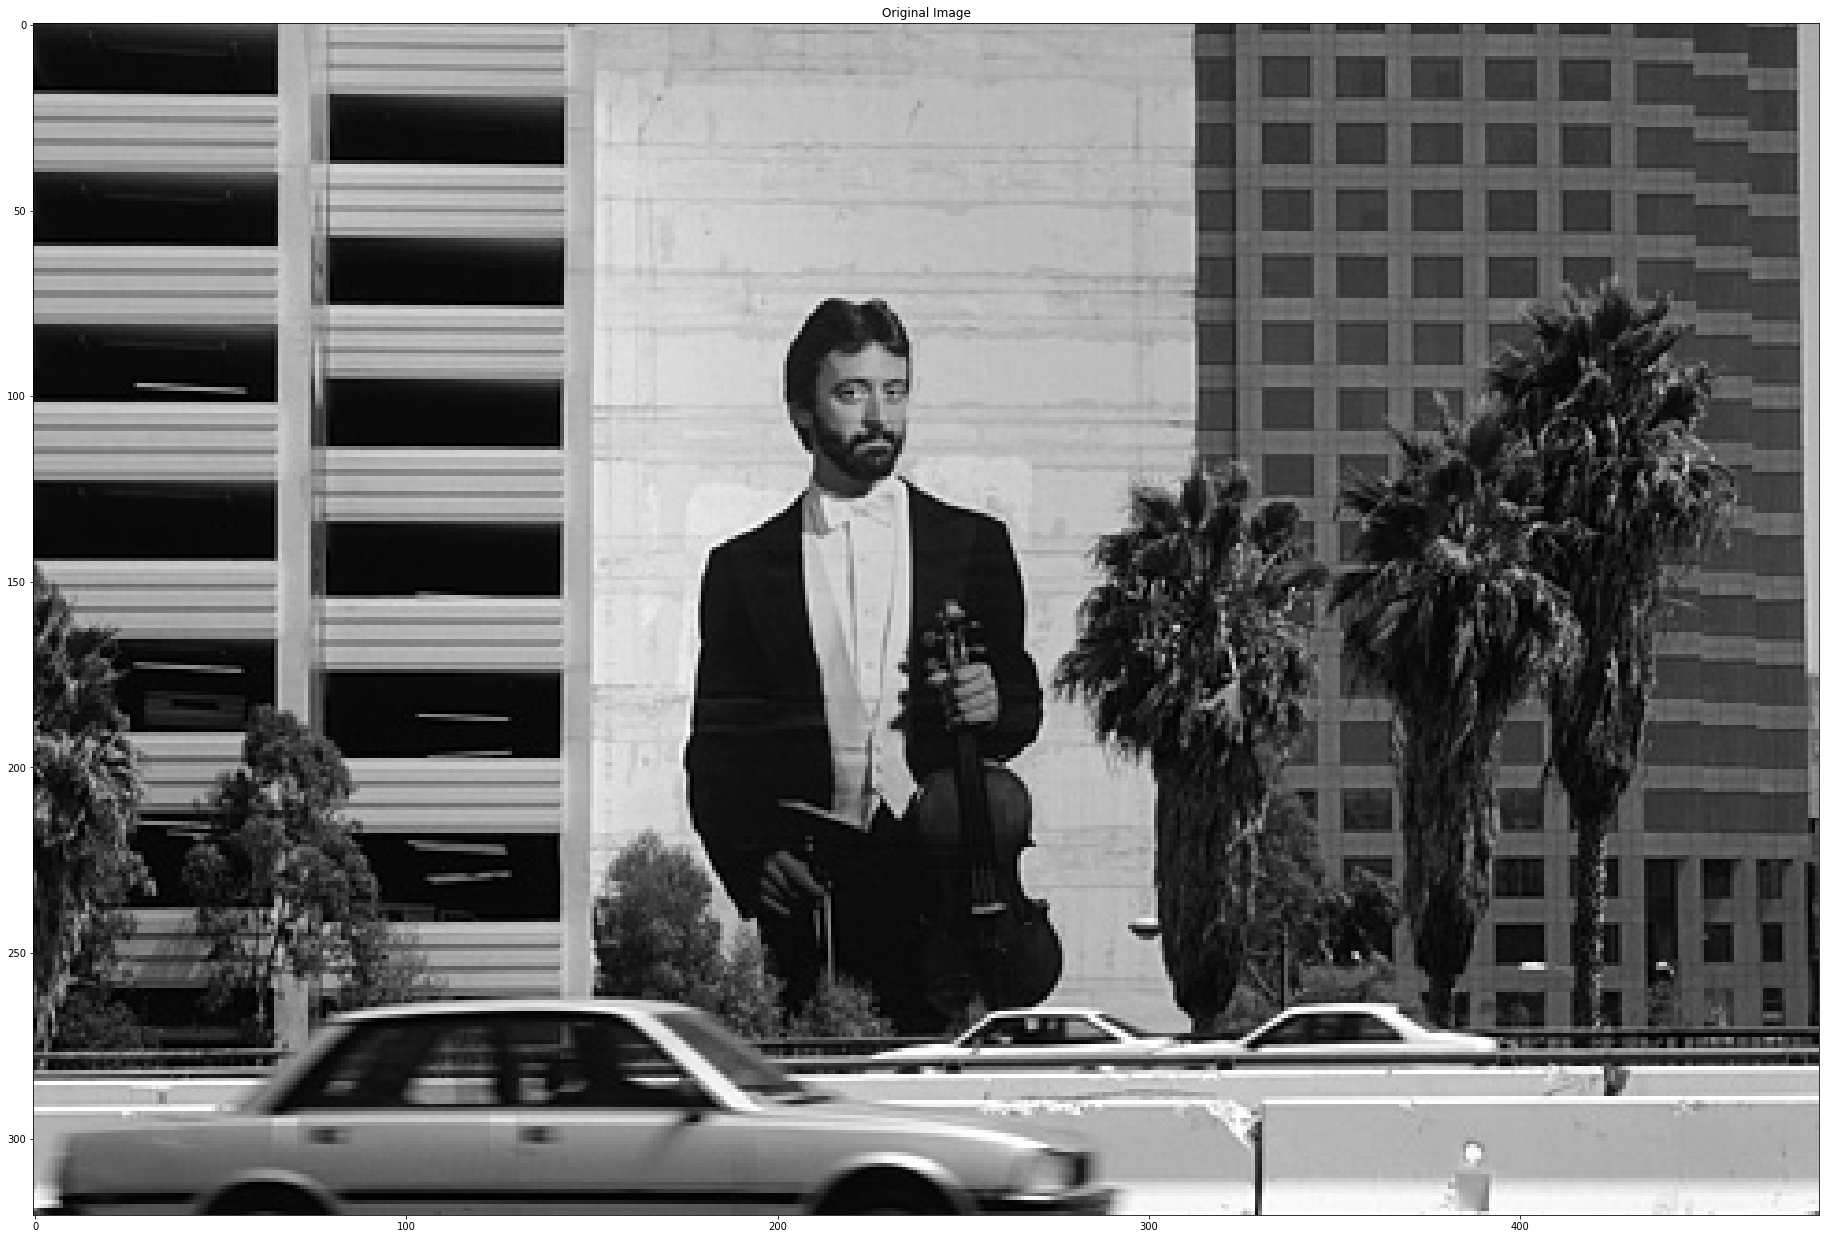

In [91]:
figsize=(32,32)
plt.figure(figsize = figsize)
img=cv2.imread(os.path.join('testsets/set12','119082.jpg'))
"""
for img in os.listdir('testsets/set12'): #Location for test set
    loaded=cv2.imread(os.path.join(location,img))
    training_data.append(loaded)
  return training_data
"""
temp=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(temp, cmap='gray')
plt.title('Original Image')

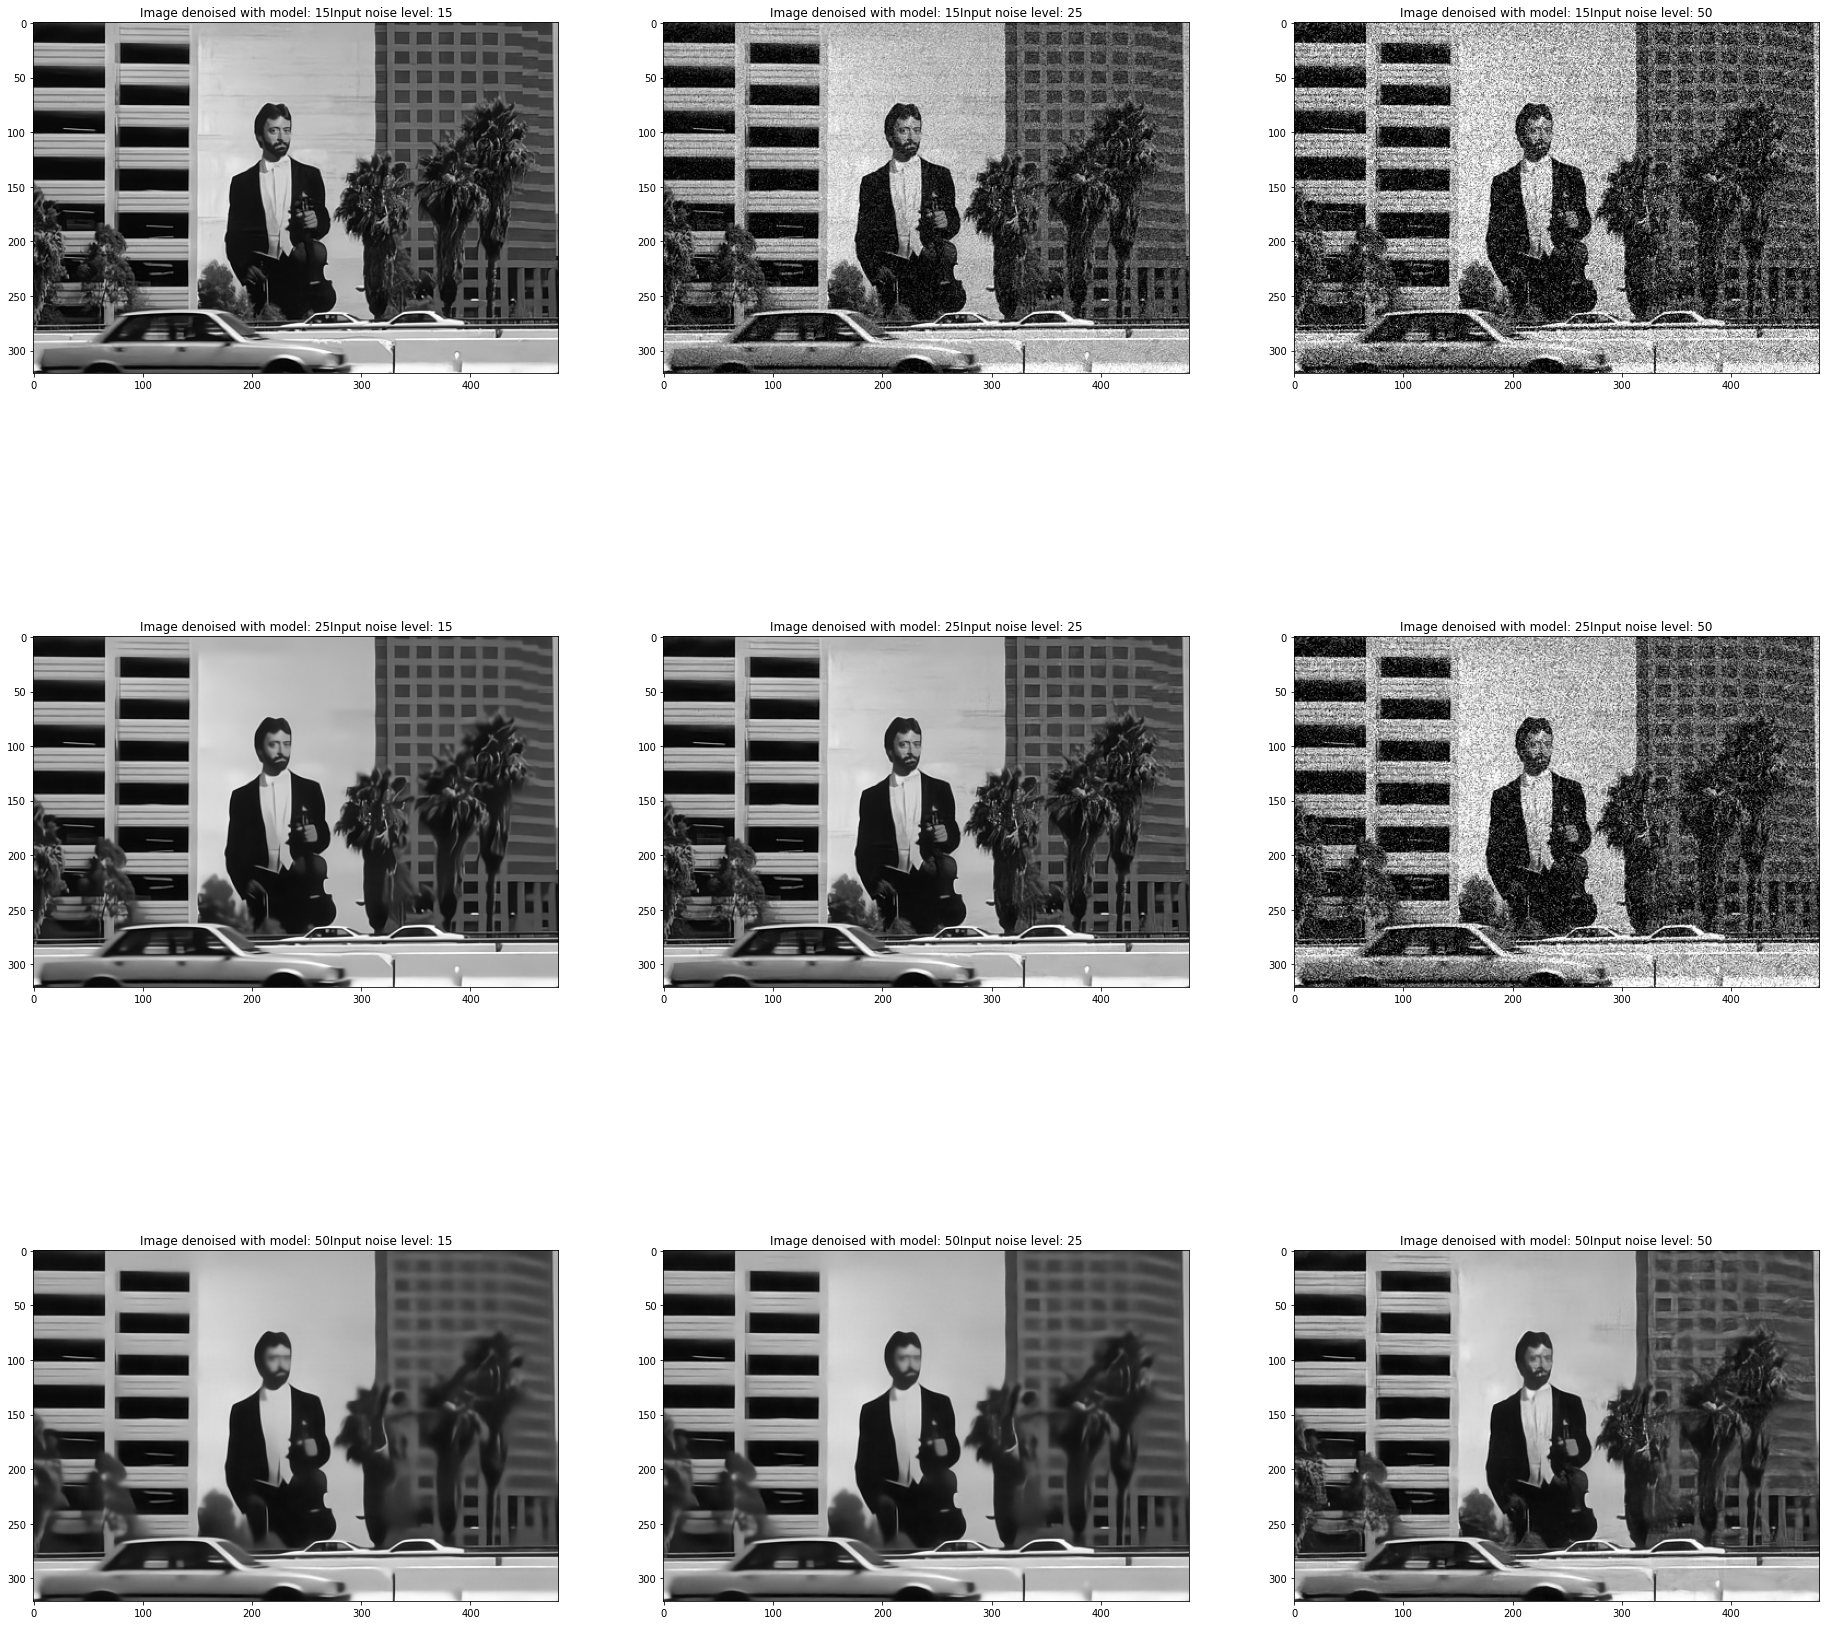

In [92]:
plt.figure(figsize = (32,32))
loop=1
# 3 Rows, 3 Colums # For DnCNN
# First row is DnCNN
for i in noise_range: #Each Row is a model
  for j in noise_range: #Each Column is an input noise level
    path='results/DNCNN' + str(i) + '/N' + str(j) + '/set12_dncnn_' + str(i)
    img=cv2.imread(os.path.join(path,'119082.jpg'))
    temp=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,loop)
    # Convert to RGB
    plt.imshow(temp)
    plt.title("Image denoised with model: " +str(i) + "Input noise level: " +str(j))
    loop+=1


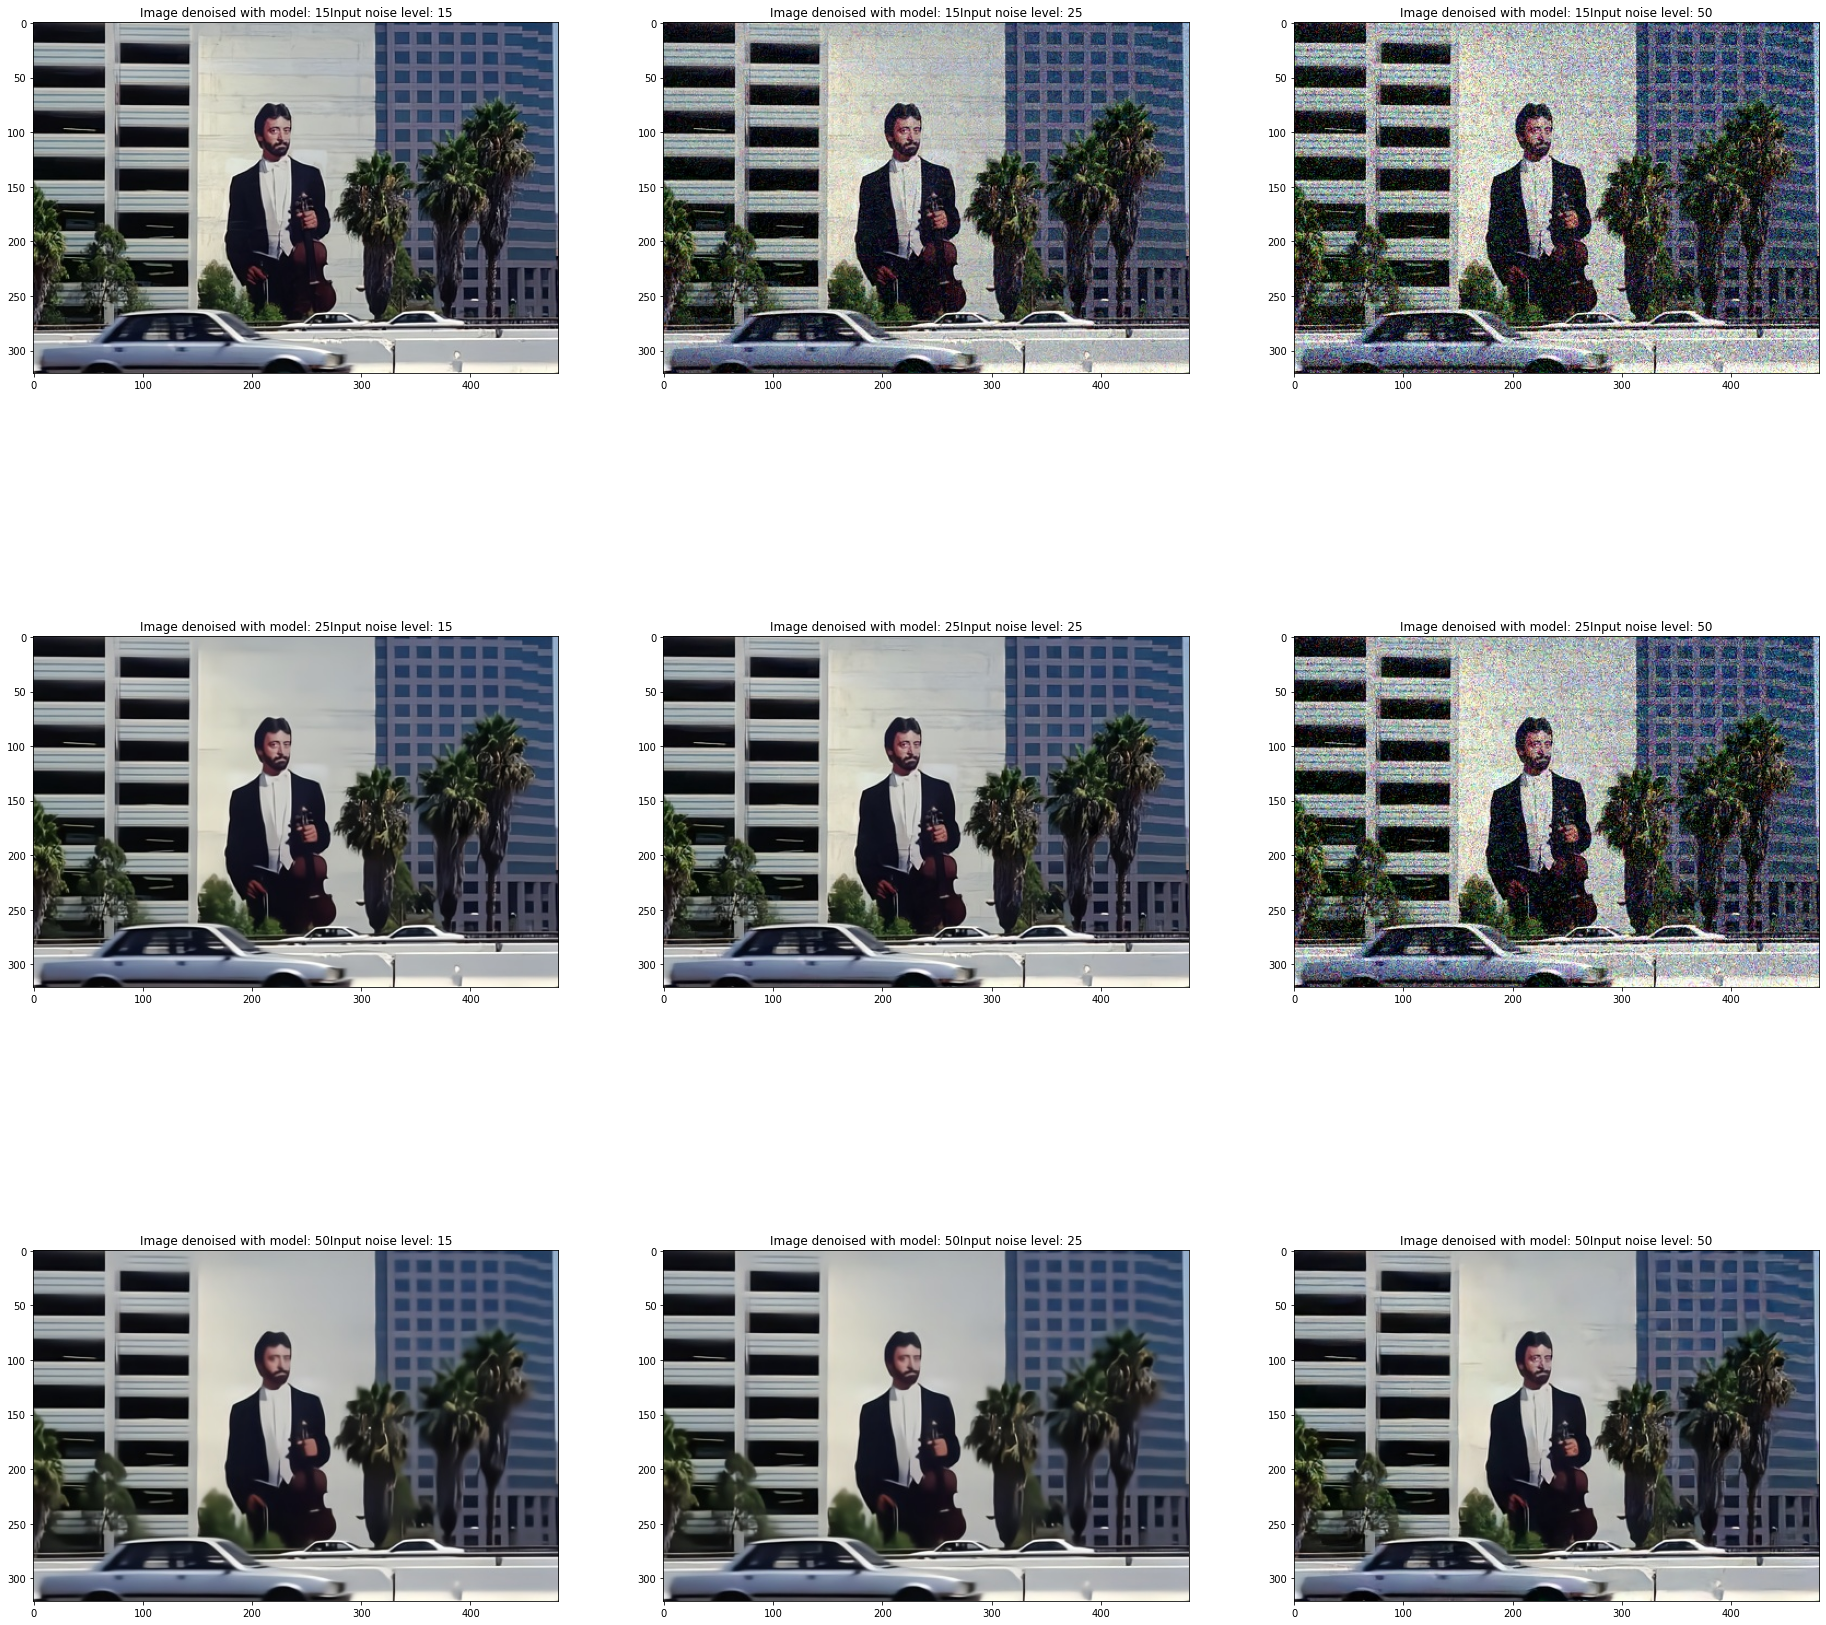

In [94]:
plt.figure(figsize = (32,32))
loop=1
# 3 Rows, 3 Colums # For DnCNN
# First row is DnCNN
for i in noise_range: #Each Row is a model
  for j in noise_range: #Each Column is an input noise level
    path='results/ffd_color' + str(i) + '/N' + str(j) + '/set12_ffdnet_color'
    img=cv2.imread(os.path.join(path,'119082.jpg'))
    temp=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(3,3,loop)
    plt.imshow(temp)
    plt.title("Image denoised with model: " +str(i) + "Input noise level: " +str(j))
    loop+=1


In [90]:
#We notice that both models have results that visually perform better for We